## Phase I : Merging, Data Exploration & EDA

In [9]:
# General import
import os
import glob
import pandas as pd
from pandas_profiling import ProfileReport
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import time
import os
from itertools import product
from pylab import rcParams
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess, Fourier

# Plotting import
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import datetime

In [10]:
# Defines path to csv files
path = "Dataset//store-sales-time-series-forecasting//"

#### Section 1 : Reading the files from the dataset

In [15]:
# reading csv files
csv1 = pd.read_csv(path + 'train.csv', index_col=False)
# print(csv1)
csv2 = pd.read_csv(path + 'transactions.csv', index_col=False)
# print(csv2)
csv3 = pd.read_csv(path + 'stores.csv', index_col=False)
# print(csv3)
csv4 = pd.read_csv(path + 'oil.csv', index_col=False)
# print(csv4)
csv5 = pd.read_csv(path + 'holidays_events.csv', index_col=False)
# print(csv5)

#### Section 2 : Merging the csv files 

In [16]:
# reading two csv files
data1 = pd.read_csv(path + 'train.csv', index_col=False)
data2 = pd.read_csv(path + 'transactions.csv', index_col=False)
  
# using merge function by setting how='inner'
output = pd.merge(data1, data2,
                   on=['date','store_nbr'], 
                   how='inner')
  
#Saving our combined csv data as a new file
output.to_csv(path + 'combine.csv', index=False)

# displaying result
output.head()

,id,date,store_nbr,family,sales,onpromotion,transactions
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770
1,562,2013-01-01,25,BABY CARE,0.0,0,770
2,563,2013-01-01,25,BEAUTY,2.0,0,770
3,564,2013-01-01,25,BEVERAGES,810.0,0,770
4,565,2013-01-01,25,BOOKS,0.0,0,770


In [17]:
# reading two csv files
data1 = pd.read_csv(path + 'combine.csv', index_col=False)
data2 = pd.read_csv(path + 'oil.csv', index_col=False)
  
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2, 
                   on='date',
                   how='inner')
  
#Saving our combined csv data as a new file
output1.to_csv(path + 'combine1.csv', index=False)

# displaying result
output1.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,NaN
1,562,2013-01-01,25,BABY CARE,0.0,0,770,NaN
2,563,2013-01-01,25,BEAUTY,2.0,0,770,NaN
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,NaN
4,565,2013-01-01,25,BOOKS,0.0,0,770,NaN


In [18]:
# reading two csv files
data1 = pd.read_csv(path + 'combine1.csv', index_col=False)
data2 = pd.read_csv(path + 'stores.csv', index_col=False)
  
# using merge function by setting how='inner'
output2 = pd.merge(data1, data2, 
                   on='store_nbr', 
                   how='inner')

#Saving our combined csv data as a new file
output2.to_csv(path + 'combine2.csv', index=False)

# displaying result
output2.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,NaN,Salinas,Santa Elena,D,1


In [19]:
# reading two csv files
data1 = pd.read_csv(path + 'combine2.csv', index_col=False)
data2 = pd.read_csv(path + 'holidays_events.csv', index_col=False)
  
# using merge function by setting how='inner'
output3 = pd.merge(data1, data2, 
                   on='date', 
                   how='inner')
  
#Saving our combined csv data as a new file
output3.to_csv(path + 'combine3.csv', index=False)

# displaying result
output3.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,description,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
1,562,2013-01-01,25,BABY CARE,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
2,563,2013-01-01,25,BEAUTY,2.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
4,565,2013-01-01,25,BOOKS,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False


Dropping the "Description" column as we won't be using it later.

In [23]:
# reading two csv files
df = pd.read_csv(path + 'combine3.csv', index_col=False)
#Selecting the "description" column and axis=1 as we are delecting the column
final = df.drop(columns='description',axis=1)

#Saving our combined csv data as a new file
final.to_csv(path + 'final.csv', index=False)

# displaying result
final.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
1,562,2013-01-01,25,BABY CARE,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
2,563,2013-01-01,25,BEAUTY,2.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
4,565,2013-01-01,25,BOOKS,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False


#### Section 3 : Initial inspection of the dataset using Pandas profiling

In [21]:
profile = ProfileReport(df2, title="Pandas Profiling Report", minimal=True)

In [22]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Section 4 : Data Exploration

In [7]:
#Reading the csv
data = pd.read_csv(path + 'final.csv', index_col=False)

#For checking the total number of rows and columns in the dataset
data.shape

(322047, 16)

In [8]:
#For analysing the dataset statisctically
data.describe()

,id,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000,322047.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,1734.117840,64.077912,8.531202
std,7.862493e+05,15.595174,1246.881240,15.512095,1050.335018,25.147682,4.713809
min,5.610000e+02,1.000000,0.000000,0.000000,54.000000,27.960000,1.000000
25%,1.010616e+06,13.000000,1.000000,0.000000,1030.000000,44.660000,4.000000
50%,1.842406e+06,27.000000,19.000000,0.000000,1409.000000,51.440000,9.000000
75%,2.209556e+06,40.000000,241.260505,1.000000,2148.000000,94.740000,13.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,8359.000000,107.950000,17.000000


In [9]:
#For checking the unique values in the dataset
data.nunique()

id              292545
date               179
store_nbr           54
family              33
sales            56108
onpromotion        285
transactions      3097
dcoilwtico         163
city                22
state               16
str_type             5
cluster             17
type                 5
locale               3
locale_name         24
transferred          2
dtype: int64

In [10]:
#Checking for NUll values in the dataset
data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
dcoilwtico      22044
city                0
state               0
str_type            0
cluster             0
type                0
locale              0
locale_name         0
transferred         0
dtype: int64

Here, only "dcoilwtico" column has the majority of NULL values, hence we will need to analyse this column specifically before deciding any operation on it

#### Section 5 : Exploratory Data Analysis

##### Relationship Analysis

##### 1. Correlation Matrix : 
A correlation matrix is simply a table which displays the correlation. It is best used in variables that demonstrate a linear relationship between each other i.e. coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.

In [59]:
# Dropping the coulmn "id" from the dataset as it isn't a significant coulmn for correlation matrix
data1 = data.drop(columns='id',axis=1)
correlation = data1.corr()
data1.head()

,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,2013-01-01,25,AUTOMOTIVE,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
1,2013-01-01,25,BABY CARE,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
2,2013-01-01,25,BEAUTY,2.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
3,2013-01-01,25,BEVERAGES,810.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
4,2013-01-01,25,BOOKS,0.0,0,770,NaN,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False


<AxesSubplot:>

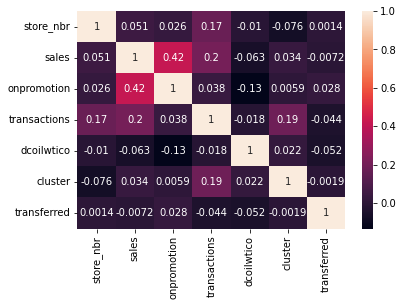

In [60]:
#Plotting the heatmap for correlation matrix
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

From the above matrix we can infer that the correlation between sales and transaction is weak. And the correlation between sales and promotion is strong.

Now trying to find the correlation between sales, transaction and oil prices

<AxesSubplot:>

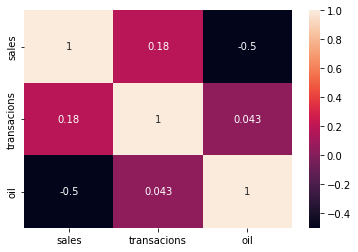

In [61]:
sales_transaction = pd.DataFrame()
sales_transaction['sales'] = avg_sales['sales']
sales_transaction['transacions'] = avg_transactions['transactions']
sales_transaction['oil'] = data_oil['dcoilwtico']
sales = sales_transaction.corr()
sns.heatmap(sales, xticklabels=sales.columns, yticklabels=sales.columns, annot=True)

Hence we can infer from the above matrix, that the correlation between sales and transaction is weak. Whereas, the correlation between oil and sales is strong

##### Distribution of Store by City and State

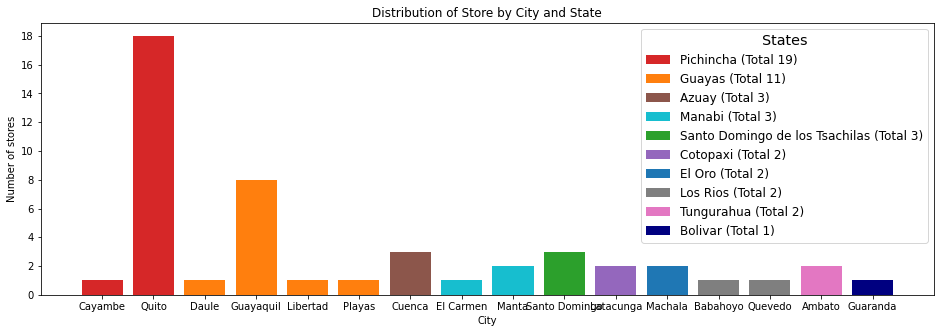

In [17]:
stores_data = pd.read_csv(path + 'stores.csv', index_col=False)
top_city  = stores_data.groupby('city') .size().sort_values(ascending=False)
top_state = stores_data.groupby('state').size().sort_values(ascending=False)
states = top_state.index.values

stores_data_grouped = stores_data.groupby(['state','city']).agg({'city':'count'})
color = ["tab:red","tab:orange","tab:brown","tab:cyan","tab:green","tab:purple","tab:blue","tab:gray","tab:pink", "navy","darkred"]
fig, ax = plt.subplots( figsize=(16,5))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Distribution of Store by City and State")
ax.set_ylabel("Number of stores")
ax.set_xlabel("City")
custom_label=[]
custom_legend = []
for i in range(0,10):
    u = stores_data_grouped.loc[ states[i] ]
    ax.bar(u.index.values, u.values.flatten(),color=color[i])
    custom_label.append ( Patch(facecolor=color[i])  )
    custom_legend.append( states[i] + " (Total {})".format(top_state[i]))
ax.legend(custom_label, custom_legend, fontsize="large", labelcolor="black", 
          fancybox=True, title = "States", title_fontsize = "x-large")
plt.show()

Only 5 states have more than 2 stores. From 10th states, there is only one store per state.

##### Daily Average Sales by All Store

Now we try to analyse the sales of the stores in their repective area. Below is the calculation of sales taking average daily for the whole period of 1600 days

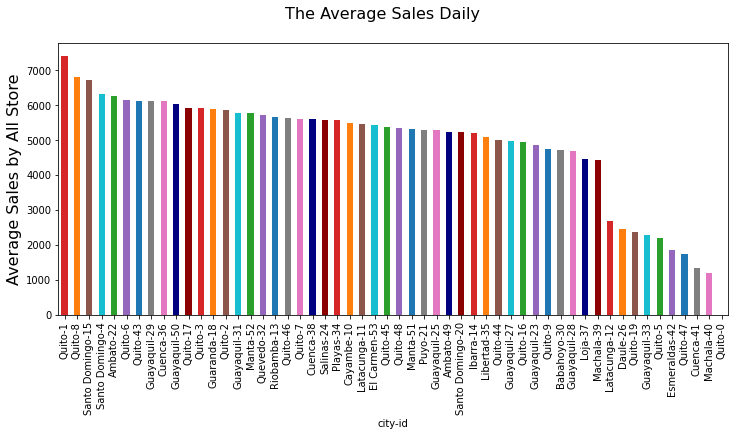

In [18]:
store_nbr_id  = stores_data.index.values # stores_data.store_nbr.unique()
train_data = pd.read_csv(path + 'train.csv', index_col="id", header=0, parse_dates=['date'])
sales_grouped = train_data.groupby(['store_nbr','date']).agg({'sales':'sum'})
sales_by_store_id = {}
for store in store_nbr_id:
    sales_by_store_id[store] = {'sale': sales_grouped.iloc[store].sales.mean() ,
                                'city': stores_data.city[store] ,
                                'city-id': stores_data.city[store]+"-{}".format(store) ,
                                'state': stores_data.state[store] ,
                                'type': stores_data.str_type[store] ,
                                'cluster': stores_data.cluster[store] }
# Convert to Pandas DataFrame 
sales_by_store_id = pd.DataFrame.from_dict(sales_by_store_id, orient='index') 

sales_by_city      = {}
for city in top_city.index.values:
    sales_by_city[city]      = {'sum': sales_by_store_id [ stores_data.city==city ].sale.sum(),
                                'mean': sales_by_store_id [ stores_data.city==city ].sale.mean() }
sales_by_city      = pd.DataFrame.from_dict(sales_by_city, orient='index')
# Sorting 
sales_by_store_id.sort_values( by='sale', inplace=True, ascending=False )
sales_by_city_sum  = sales_by_city.sort_values( by='sum', ascending=False )
# Ploting
figsize = (12,5)
fig, ax0 = plt.subplots(figsize=figsize)
sales_by_store_id.plot(kind="bar",x='city-id',y='sale',figsize=figsize, ax=ax0,color=color, align='center', legend=False)
plt.suptitle("The Average Sales Daily",  fontsize=16, ha='center')
ax0.set_ylabel('Average Sales by All Store',  fontsize=16);

Average Daily Sales in all Stores : There are 54 stores at different locations (including different cities and states). However, the averages of sales per day are not similar. Most effective stores are located in Quito city. There are also about 9 stores running badly. An available suggestion is to shut down these stores or look for effective solutions to improve the business.

##### Average Sales by City

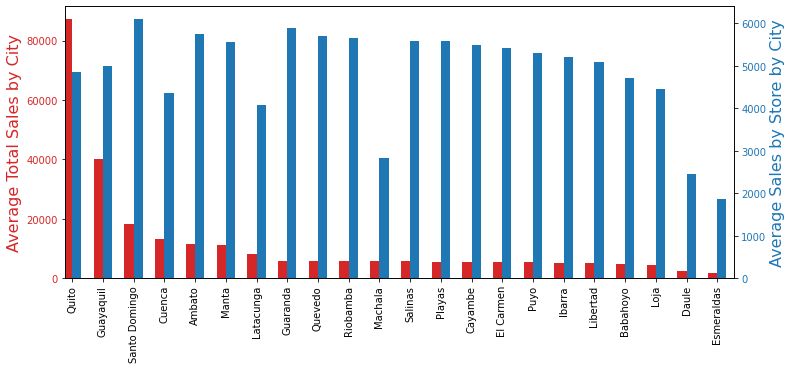

In [19]:
color1 = "tab:red"
color2 = "tab:blue"
fig, ax1 = plt.subplots(figsize=figsize)
sales_by_city_sum.plot(kind="bar",y='sum', figsize=figsize,ax=ax1,color=color1, align='edge', width=-0.3, legend=False)
ax2 = ax1.twinx()
sales_by_city_sum.plot(kind="bar",y='mean',figsize=figsize,ax=ax2,color=color2, align='edge', width=0.3,  legend=False)
############# Style Set up ###############
ax1.set_ylabel('Average Total Sales by City', color=color1, fontsize=16)
ax1.tick_params(axis='y', labelcolor=color1)
ax2.set_ylabel('Average Sales by Store by City', color=color2, fontsize=16)  
ax2.tick_params(axis='y', labelcolor=color2)

Average Sales by City : 
1. Looking at the graph, we can see that Santo Domingo has the highest daily average sales wrt city. It is followed by Guaranda city.
2. Whereas, Quito also has the high daily-average sales both per city and per store. 

##### Average Sales by Month & Quarter

In [20]:
sales_grouped  = train_data.groupby('date').agg({'sales':'sum'}).to_period("D")
sales_grouped['year']      = sales_grouped.index.year
sales_grouped['quarter']   = sales_grouped.index.quarter
sales_grouped['month']     = sales_grouped.index.month
sales_grouped['week']      = sales_grouped.index.week
sales_grouped['dayofweek'] = sales_grouped.index.dayofweek  # Monday=0, Sunday=6
sales_grouped['dayofmonth']= sales_grouped.index.day  # day in month from 01 to 31
sales_grouped['dayofyear'] = sales_grouped.index.dayofyear

sales_smooth7  = sales_grouped.copy()
sales_smooth30 = sales_grouped.copy()
sales_smooth365= sales_grouped.copy()

sales_smooth7["sales"]   = sales_smooth7.  sales.rolling(window=7,  center=True, min_periods=3 ).mean()
sales_smooth30["sales"]  = sales_smooth30. sales.rolling(window=30, center=True, min_periods=15).mean()
sales_smooth365["sales"] = sales_smooth365.sales.rolling(window=365,center=True, min_periods=183).mean()

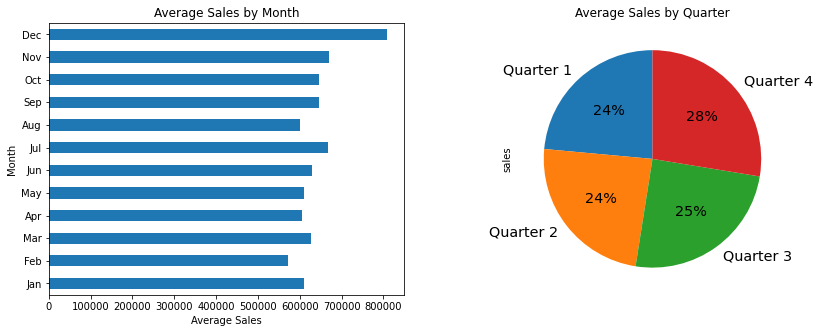

In [21]:
figsize = (14,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)
sales_grouped.groupby(['month']).agg({'sales':'mean'}).plot(kind="barh",ax=ax1)
ax1.set(title="Average Sales by Month")
ax1.set(ylabel="Month", xlabel="Average Sales")
ax1.get_legend().remove()
labels1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax1.set_yticks(range(0,12), labels1)

sales_grouped.groupby(['quarter']).agg({'sales':'mean'}).plot.pie(y="sales",ax=ax2, legend=False, autopct='%1.f%%',
                             startangle=90, labels=["Quarter 1","Quarter 2","Quarter 3","Quarter 4"], fontsize="x-large")
ax2.set(title="Average Sales by Quarter")



plt.show()

Average Sales by Month : As Decemeber is a holiday season, we can see that the maximum sales occor in this month. The sales maybe related to the house decoration for Christmas Eve or New Year's celebration.

Average Sales by Quarter : The percentage sales in each quarter is pretty-much same. But comparatively, the percentage sales in Quarter-4 is the highest, which is in correspondence with the average monthly sales.

##### Average Sales by Day in Week and Month

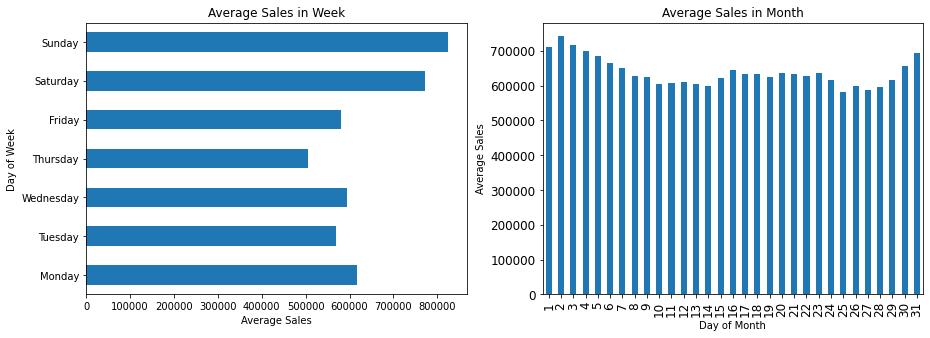

In [22]:
figsize = (15,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)

sales_grouped.groupby(['dayofweek']).agg({'sales':'mean'}).plot.barh(ax=ax1)
ax1.set(title="Average Sales in Week")
ax1.set(ylabel="Day of Week", xlabel="Average Sales")
ax1.get_legend().remove()
labels1 = ["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]
ax1.set_yticks(range(0,7), labels1)

sales_grouped.groupby(['dayofmonth']).agg({'sales':'mean'}).plot.bar(ax=ax2,  fontsize="large")
ax2.set(title="Average Sales in Month")
ax2.set(ylabel="Average Sales", xlabel="Day of Month")
ax2.get_legend().remove()

plt.show()

Average Sales in Week : As expected, people spent more money buying stuff on weekends compared to weekdays.

Average Sales in Month : Despite people spending more money on weekends, the pattern in a month sticks out with a peak in the middle and high sales at the beginning and the end of a month. It is perhaps due to the dates people get paid in the public sector.

##### Visualization of Seasonality and Trend

It would be good to know how the sales behave at different times to understand their seosonality and the overall trend. Seasonalities include each season, monthly and quarterly.

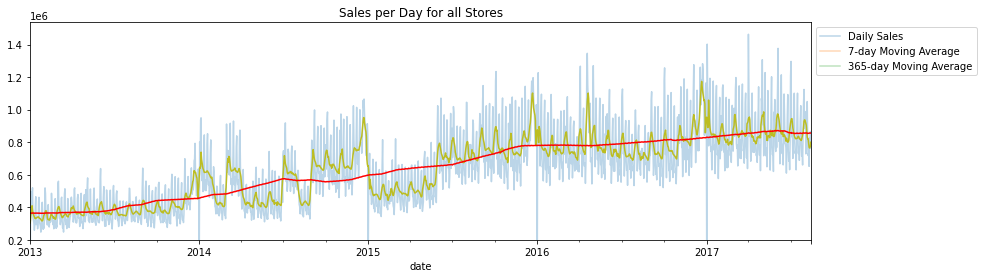

In [23]:
figsize = (14,4)
fig, ax = plt.subplots(figsize=figsize)
sales_grouped. plot(ax=ax, alpha=0.3)
sales_smooth7. plot(ax=ax)
sales_smooth365.plot(ax=ax, color="r")
ax.legend(["Daily Sales","7-day Moving Average","365-day Moving Average"],bbox_to_anchor=(1.0, 1.0))
ax.set(ylim=2e5, title="Sales per Day for all Stores")
plt.show()

Based on the above graph, we could see that the sales were peaking during New Years Eve.

##### Sales in period of 365 days

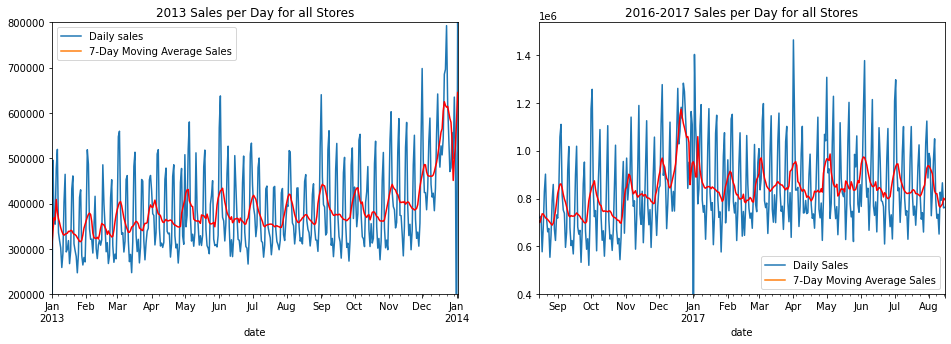

In [24]:
figsize = (16,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)
sales_grouped. plot(ax=ax1)
sales_smooth7. plot(ax=ax1, color="r")
ax1.legend(["Daily sales","7-Day Moving Average Sales"])
ax1.set(ylim=[2e5, 8e5], title="2013 Sales per Day for all Stores")
ax1.set(xlim=[sales_grouped.index[0],sales_grouped.index[365]] )

sales_grouped. plot(ax=ax2)
sales_smooth7. plot(ax=ax2, color="r")
ax2.legend(["Daily Sales","7-Day Moving Average Sales"])
ax2.set(ylim=4e5, title="2016-2017 Sales per Day for all Stores")
ax2.set(xlim=[sales_grouped.index[-365],sales_grouped.index[-1]] )
plt.show()

Based on zoomed-in graphs, we could see 12 peaks of sales for 365 days (equivalently 12 months or a year). Hence, there is a monthly frequency. Moreover, the sales increased dramatically during the transition times from the preview year to the new year which presented an annual pattern. (The sales were smoothed with 7-day MA to eliminate the weekly pattern)

##### Weekly Seasonality

In [26]:
# Functions defined and modified

def seasonal_plot(X, y, period, freq, ax=None, atext=""):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette(
        "husl",
        n_colors=X[period].nunique(),
    )
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    if atext: atext = atext + " ";
    ax.set_title(atext + f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

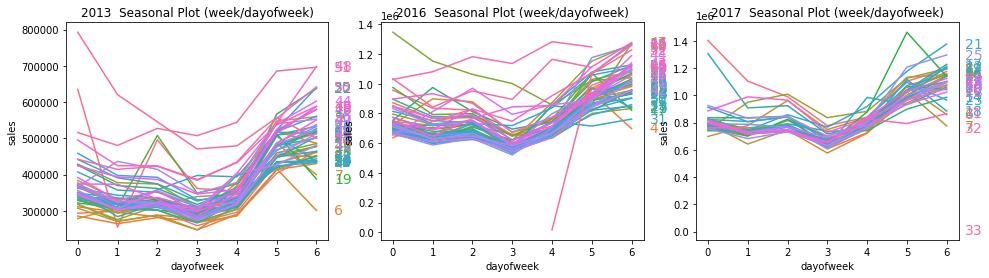

In [27]:
figsize = (16,4)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=figsize)
seasonal_plot(sales_grouped.loc[sales_grouped['year']==2013], y='sales', period='week', freq='dayofweek',ax=ax1, atext="2013 ")
seasonal_plot(sales_grouped.loc[sales_grouped['year']==2016], y='sales', period='week', freq='dayofweek',ax=ax2, atext="2016 ")
seasonal_plot(sales_grouped.loc[sales_grouped['year']==2017], y='sales', period='week', freq='dayofweek',ax=ax3, atext="2017 ");

There was a pattern for weekly sales in which weekends had more sales than weekdays. It makes sense because people are off on weekends and have available time to spend money.

##### Monthly Seasonality

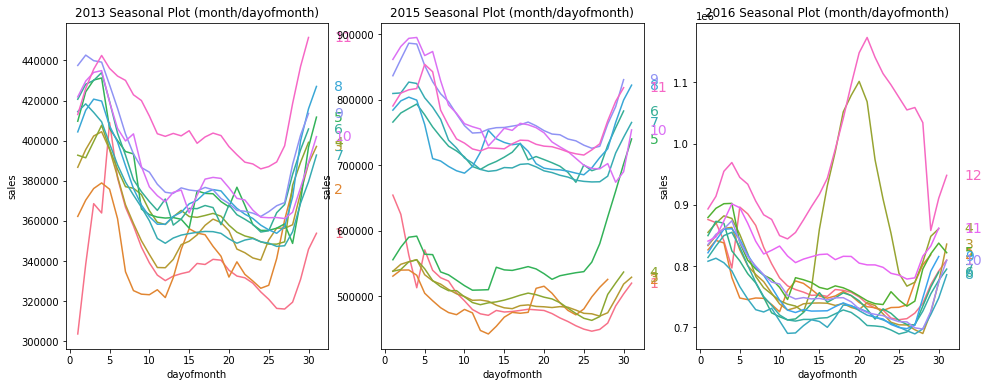

In [28]:
sales_smooth              = sales_smooth7.copy()
figsize = (16,6)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=figsize)
seasonal_plot(sales_smooth.loc[ (sales_smooth['year']==2013) & (sales_smooth['month']!=12 )
                              ], y='sales', period='month', freq='dayofmonth',ax=ax1, atext="2013")
seasonal_plot(sales_smooth.loc[ (sales_smooth['year']==2015) & (sales_smooth['month']!=12 )
                              ], y='sales', period='month', freq='dayofmonth',ax=ax2, atext="2015")
seasonal_plot(sales_smooth.loc[sales_smooth['year']==2016], y='sales', period='month', freq='dayofmonth',ax=ax3, atext="2016");

The behavior of the last month of the year is shown in the last figure (on the right). By eliminating this month, we can see a strong monthly pattern for sales.

1. There were two troughs. The sales went down to trough around days 10 and 25
2. There were two peaks. The sales went up to the biggest peak at the end of the month. There was a minor peak at around days 15 to 20.

##### Annual Seasonality

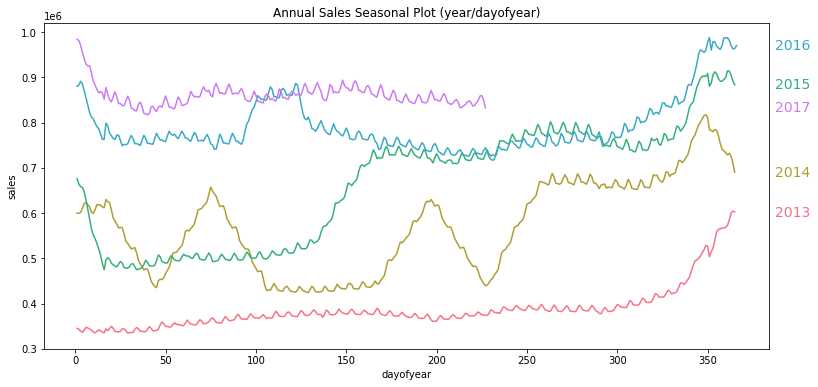

In [32]:
sales_smooth              = sales_smooth30.copy()
figsize = (13,6)
fig, ax = plt.subplots(figsize=figsize)
seasonal_plot(sales_smooth, y="sales", period="year", freq="dayofyear", ax=ax, atext="Annual Sales");
ax.set(ylim=3e5);

After smoothing the data in a period of 30 days to eliminate the impact of monthly and weekly seasonalities, we can conclude that the sales were rising by the end of each year and slowly went down after the new year period. During 2014, the price of crude oil was in trouble, hence, could influence the business and caused abnormal peaks of sales.

##### Periodogram

In [33]:
def plot_periodogram(ts, detrend='linear', ax=None, atext=""):
    from scipy.signal import periodogram
    fs = 365.25
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    if atext: atext = atext + " ";
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title(atext + "Periodogram")
    return ax

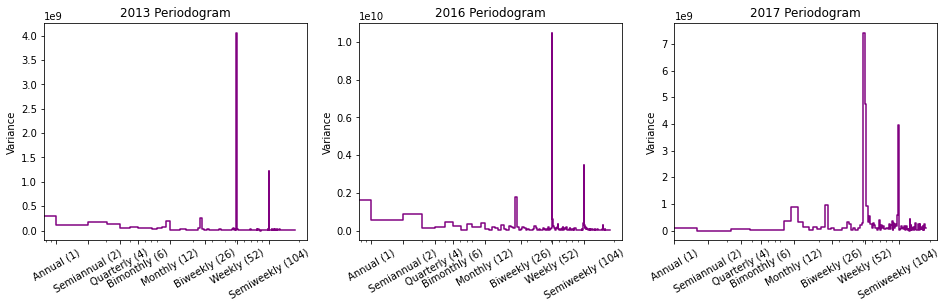

In [34]:
sales_2013 = sales_grouped.loc[ sales_grouped.year == 2013]
sales_2016 = sales_grouped.loc[ sales_grouped.year == 2016]
sales_2017 = sales_grouped.loc[ sales_grouped.year == 2017]
figsize = (16,4)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=figsize)
plot_periodogram(sales_2013.sales, ax=ax1, atext="2013")
plot_periodogram(sales_2016.sales, ax=ax2, atext="2016")
plot_periodogram(sales_2017.sales, ax=ax3, atext="2017");

Based on these periodograms:
There are strong patterns of weekly frequency.
The semi-weekly patterns were also found in the previous analysis.
There were weak patterns of monthly and bimonthly frequencies.
There was a slight impact on the annual frequency

##### Transaction Analysis : This feature is highly correlated with sales. More transactions often mean more sales.

In [35]:
#Finding the top stores wrt sales
top_stores_by_sale = sales_by_store_id.index[0:10].values
print("Top stores are: {}".format(top_stores_by_sale))

Top stores are: [ 1  8 15  4 22  6 43 29 36 50]


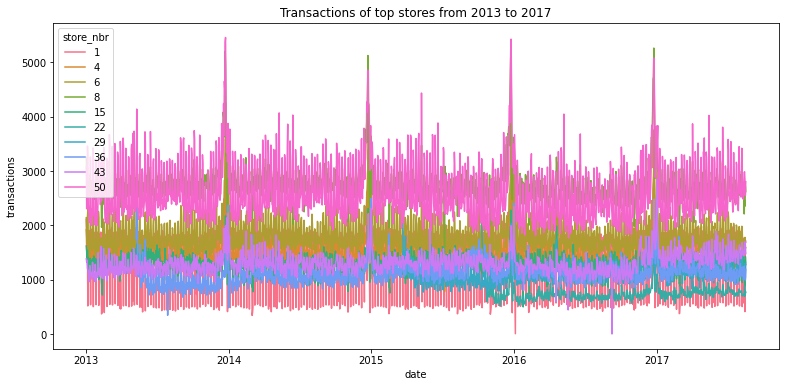

In [40]:
transactions_data = pd.read_csv(path + 'transactions.csv', index_col=None, header=0, parse_dates=['date'])
#Finding the transaction in those top stores
transaction_top_stores = transactions_data.drop( transactions_data[ ~transactions_data.store_nbr.isin( 
            top_stores_by_sale) ].index )
top_stores_by_sale_r = pd.Series( range(len(top_stores_by_sale)), index=top_stores_by_sale ).to_dict()
transaction_top_stores['top'] = transactions_data.store_nbr.map(top_stores_by_sale_r )
transaction_top_stores.sort_values(["top", "date"], inplace=True)

#Plot the graph
figsize = (13,6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot( data=transaction_top_stores , x='date', y='transactions', hue='store_nbr', ax=ax, palette=sns.color_palette(
                                    "husl", n_colors=len(top_stores_by_sale))  )
ax.set(title="Transactions of top stores from 2013 to 2017");

Here, the transaction pattern towards the New Years Eve is similar to the sales pattern as seen above.

#### Section 6 : Data Pre-processing

##### 1. Handling the NULL values in oil.csv

After checking for NULL values, we found out that there are 22044 in oil.csv, for the oil prices. Hence, before proceeding further, we will be handling these NULL values using the "mean" of the values before it and of the one after it.

In [4]:
#Fetching the data from the csv file
output1= pd.read_csv(path + 'final.csv', index_col=False)

#fill NaN of dcoilwtico using average of the nearest values
price = 93.14 
output1['dcoilwtico1'] = 0
output1['dcoilwtico2'] = 0

for i in range(output1.shape[0]):
    if output1['dcoilwtico'].iloc[i] > 0:
        output1['dcoilwtico1'].iloc[i] = output1['dcoilwtico'].iloc[i].copy()
        price = output1['dcoilwtico'].iloc[i].copy()
    else:
        output1['dcoilwtico1'].iloc[i] = price
        
for i in range(output1.shape[0]):
    if output1['dcoilwtico'].iloc[output1.shape[0]-1-i] > 0:
        output1['dcoilwtico2'].iloc[output1.shape[0]-1-i] = output1['dcoilwtico'].iloc[output1.shape[0]-1-i].copy()
        price = output1['dcoilwtico'].iloc[output1.shape[0]-1-i].copy()
    else:
        output1['dcoilwtico2'].iloc[output1.shape[0]-1-i] = price
        
output1['dcoilwtico'] = (output1['dcoilwtico1']+output1['dcoilwtico2'])/2
output1.drop(columns=['dcoilwtico1', 'dcoilwtico2'],inplace=True)

  
#Saving our combined csv data as a new file
output1.to_csv(path + 'preprossed.csv', index=False)

# displaying result
output1.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,95.075,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
1,562,2013-01-01,25,BABY CARE,0.0,0,770,95.075,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
2,563,2013-01-01,25,BEAUTY,2.0,0,770,95.075,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,95.075,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
4,565,2013-01-01,25,BOOKS,0.0,0,770,95.075,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False


##### 2. Extracting the year value from "date" column 

We fetch the year value from the "date" column because, later we would be further separating the training dataset into : traing and validation sets. And this data division would be done on the basis of the year, as this is our time series dataset.

In [5]:
year_separation = pd.read_csv(path + 'preprossed.csv',index_col=False)
year_separation['year'] = pd.DatetimeIndex(year_separation['date']).year

#Saving our combined csv data as a new file
year_separation.to_csv(path + 'preprossed1.csv', index=False)

# displaying result
year_separation.tail()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred,year
322042,2445394,2016-10-07,22,POULTRY,253.38101,11,700,49.76,Puyo,Pastaza,C,7,Holiday,Local,Quevedo,False,2016
322043,2445395,2016-10-07,22,PREPARED FOODS,43.00000,1,700,49.76,Puyo,Pastaza,C,7,Holiday,Local,Quevedo,False,2016
322044,2445396,2016-10-07,22,PRODUCE,281.20200,1,700,49.76,Puyo,Pastaza,C,7,Holiday,Local,Quevedo,False,2016
322045,2445397,2016-10-07,22,SCHOOL AND OFFICE SUPPLIES,0.00000,0,700,49.76,Puyo,Pastaza,C,7,Holiday,Local,Quevedo,False,2016
322046,2445398,2016-10-07,22,SEAFOOD,4.00000,0,700,49.76,Puyo,Pastaza,C,7,Holiday,Local,Quevedo,False,2016


#### Section 7 : Model Selection

In [ ]:
# Add theoratical description for the model select here

#### Section 8 : Model Training

##### A). Decision Tree : 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
Some advantages of decision trees are:
1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values. Hence, we have tried to handle the NULL/missing values with the "mean" method as stated above in the preprocessing.
3. Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.


In [5]:
# Decision tree code not working --> Spencer to look into it!
# Not able to divide the train data further into --> train(2013,2014,2015,2016) & validation(2017) --> Spencer 

In [12]:
#balance_data = pd.read_csv(path + 'preprossed1.csv',index_col=False, header = None)
# Function importing Dataset
def importdata():
    balance_data = pd.read_csv(path + 'preprossed1.csv',index_col=False, header = None)
      
# Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)

# Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data


# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Dataset Length:  322048
Dataset Shape:  (322048, 17)
Dataset:      0           1          2           3      4            5             6   \
0   id        date  store_nbr      family  sales  onpromotion  transactions   
1  561  2013-01-01         25  AUTOMOTIVE    0.0            0           770   
2  562  2013-01-01         25   BABY CARE    0.0            0           770   
3  563  2013-01-01         25      BEAUTY    2.0            0           770   
4  564  2013-01-01         25   BEVERAGES  810.0            0           770   

           7        8            9         10       11       12        13  \
0  dcoilwtico     city        state  str_type  cluster     type    locale   
1      95.075  Salinas  Santa Elena         D        1  Holiday  National   
2      95.075  Salinas  Santa Elena         D        1  Holiday  National   
3      95.075  Salinas  Santa Elena         D        1  Holiday  National   
4      95.075  Salinas  Santa Elena         D        1  Holiday  National   


ValueError: could not convert string to float: '2017-05-12'

##### B). Ridge Regression:
Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.
Some advantages of Ridge regression:
1. Ridge regression advantage is to avoid overfitting. Overfitting occurs when the trained model performs well on the training data and performs poorly on the testing datasets.
2. Our ultimate model is the one that could generalize patterns; i.e. works best on the training and testing dataset.
3. Ridge regression works by applying a penalizing term(reducing the weights and biases) to overcome overfitting.


Before starting with the Ridge Regression implementation we need to perform some data manipulation

##### Data manipulation:
1. Calender creation and calculating the moving average of oil prices
2. Variable creation for the day of the week
3. Correction of the holiday event data

In [11]:
# Task 1 : Calender creation 
calendar = pd.DataFrame(index=pd.date_range('2013-01-01', '2017-08-31'))

# Calculating moving average of oil prices
df_oil = pd.read_csv(path + 'oil.csv', parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_oil['ma_oil'] = df_oil['dcoilwtico'].rolling(7).mean()

calendar = calendar.merge(df_oil, how='left', left_index=True, right_index=True)
calendar['ma_oil'].fillna(method='ffill', inplace=True)

In [12]:
# Task 2 : Variable creation for the day of the week
calendar['dofw'] = calendar.index.dayofweek

In [16]:
# Task 3 : Correction of the holiday event data
df_events = pd.read_csv(path + 'holidays_events.csv', parse_dates=['date'], infer_datetime_format=True)
#'Good Friday' mistake correction
df_events['date'] = df_events['date'].replace({'2013-04-29' : 
                                         pd.to_datetime('2013-03-29')}) 

df_events = df_events.set_index('date').sort_index()
df_events = df_events[df_events.locale == 'National'] 

# Keeping only one event 
df_events = df_events.groupby(df_events.index).first() 

# Adding "work day" into the calender days. Here "work day" means the days where there was not an actual holiday
# i.e. "Bridge" & "Transfer"
calendar['wd'] = True

calendar.loc[calendar.dofw > 4, 'wd'] = False
calendar = calendar.merge(df_events, how='left', left_index=True, right_index=True)
calendar.loc[calendar.type == 'Bridge'  , 'wd'] = False
calendar.loc[calendar.type == 'Work Day', 'wd'] = True
calendar.loc[calendar.type == 'Transfer', 'wd'] = False
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == False), 'wd'] = False
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == True ), 'wd'] = True

##### Modeling the Data :

In [25]:
df_train = pd.read_csv(path + 'preprossed1.csv',
                       usecols=['store_nbr', 'family', 'date', 'sales'],
                       dtype={'store_nbr': 'category', 'family': 'category', 'sales': 'float32'},
                       parse_dates=['date'], infer_datetime_format=True)
df_train.date = df_train.date.dt.to_period('D')
df_train = df_train.set_index(['store_nbr', 'family', 'date']).sort_index()

df_test = pd.read_csv(path + 'test.csv',
                      usecols=['store_nbr', 'family', 'date'],
                      dtype={'store_nbr': 'category', 'family': 'category'},
                      parse_dates=['date'], infer_datetime_format=True)
df_test.date = df_test.date.dt.to_period('D')
df_test = df_test.set_index(['store_nbr', 'family', 'date']).sort_index()

In [26]:
end_date='2017-08-15'
start_date='2017-04-01'

In [27]:
y = df_train.unstack(['store_nbr', 'family']).loc[start_date:end_date]

fourier = CalendarFourier(freq='W', order=4)
dp = DeterministicProcess(index=y.index,
                          constant=False,
                          order=1,
                          seasonal=False,
                          additional_terms=[fourier],
                          drop=True)
X = dp.in_sample()

# Extentions

X['oil']  = calendar.loc[start_date:end_date]['ma_oil'].values
X['dofw'] = calendar.loc[start_date:end_date]['dofw'].values
X['wd']   = calendar.loc[start_date:end_date]['wd'].values
X['type'] = calendar.loc[start_date:end_date]['type'].values

X = pd.get_dummies(X, columns=['dofw'], drop_first=True)
X = pd.get_dummies(X, columns=['type'], drop_first=False)

model = Ridge(fit_intercept=True, solver='auto', alpha=0.5, normalize=True) # try alpha,0.1 ,0.3 ,0.6 and 0.9
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# Printing the results of the model
y_pred   = y_pred.stack(['store_nbr', 'family']).reset_index()
y_target = y.stack(['store_nbr', 'family']).reset_index().copy()
y_target['sales_pred'] = y_pred['sales'].clip(0.) 
y_target.groupby('family').apply(lambda r: mean_squared_log_error(r['sales'], r['sales_pred']))